<a href="https://colab.research.google.com/github/PyMap/MDG/blob/master/Clase%204/04_02_Fundamentos_NetworX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Grafos y redes de transporte

# Clase 4

##  Parte 1. Teoría de grafos con `NetworkX` 
### Elementos iniciales 

#### Algunos conceptos básicos

A modo de inicio, cabe aclarar que no siempre existe una forma única de representar una red. Mientras esta refiere al funcionamiento de un sistema complejo, un `grafo` es la representación matemática de dicha red de relaciones. En ese sentido, contamos con infinidades de esquemas. Dentro de ellos las redes de transporte son uno más, donde generalmente las estaciones se representan por medio de nodos o vértices, y las relaciones entre ellos a través de calles o viajes. De tal manera, un grafo se compone por: 

<img align="center" width="600" height="200" src="../imagenes/nodos_ejes.png" style="float: center; padding: 0 15px">

In [1]:
#!pip install networkx

Para estar al tanto de la última versión disponible siempre es recomendable chequear en el [repositorio oficial](https://github.com/networkx/networkx). También dejamos el link a la [documentación](https://networkx.org/documentation/stable//reference/introduction.html) de la librería.

In [2]:
# última release
!pip show networkx | grep Version

Version: 2.5


## Sección 1: Amrando nuestro grafo

Comencemos por armar un grafo no dirigido, distinguiendo nodos y ejes.

In [3]:
# importar libreria
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# creamos un grafo no dirigido
G = nx.Graph()

In [5]:
# armamos una lista con los que serán nuestros nodos
nodos = list(range(9))

In [6]:
# y la usamos para agregarlos a nuestro objeto de tipo Graph
G.add_nodes_from(nodos)

Como vimos, este objeto se crea cuando instanciamos la clase Graph. Tanto los nodos como los ejes son atributos de este tipo de objetos. Veamos cómo se puede acceder a los mismos.

In [7]:
# los nodos son un atributo de los grafos. Nosotros creamos 5 en total
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8))

Ahora definamos las conexiones de nuestro grafo. Es decir, los ejes. Como dijimos no existe una única manera de representar una red. Y si bien las de transporte suelen seguir una misma estrructura de nodos y ejes, las conexiones entre los primeros sí pueden ser algo más aleatorio.

In [8]:
print('Conectado nodos:')
print('***************')
for n in range(0, len(nodos),3):
    print(n, '-', n+1)
    G.add_edge(n, n+1)
    
    print(n+1, '-', n+2)
    G.add_edge(n+1, n+2)

Conectado nodos:
***************
0 - 1
1 - 2
3 - 4
4 - 5
6 - 7
7 - 8


In [9]:
# y los devolvemos como una lista de tuplas. Cada una, con los nodos que conecta el eje
G.edges()

EdgeView([(0, 1), (1, 2), (3, 4), (4, 5), (6, 7), (7, 8)])

Usemos el método `draw` de NetworkX para previsualizar cómo se vería esta red de relaciones

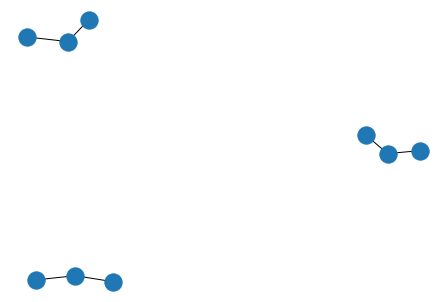

In [10]:
nx.draw(G)

Vale aclarar que todavía no exploramos ninguno de los parametros de `draw`. Tampoco agregamos la noción de espacialidad a nuestro grafo, con lo cual, al no fijar la posición de los nodos este método asigna aleatoriamente su ubicación cada vez que lo ejecutamos:

In [11]:
# conectemos ahora los segmentos inconexos para conformar toda la red
G.add_edge(2,5)
G.add_edge(7,5)

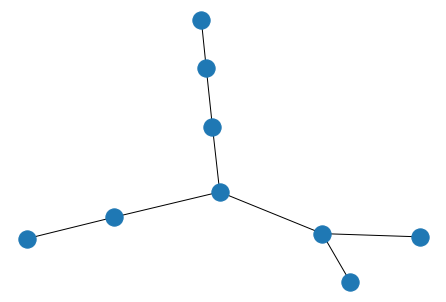

In [12]:
nx.draw(G)

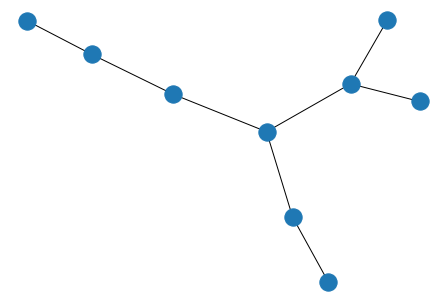

In [13]:
# vemos que las relaciones se mantienen, pero la forma del grafo cambia
nx.draw(G)

A no preocuparse, a lo largo de este notebook iremos viendo cuáles son las posibilidades que nos brinda este método para poder customizar nuestro grafo. Prosigamos...

### 1. 1. Nodos o vértices

Como dijimos, uno de los componentes principales de un grafo son sus nodos. Ya sabemos que con el método `add_nodes_from` podemos incluirlos en nuestro objeto de tipo Graph. Ahora veamos qué tipo de operaciones podemos hacer sobre los mismos. 

Veremos que los nodos se vuelven accesibles, como cualquier iterable, a través de un índice. Una vez allí, podemos decidir qué tipo de atributo agregarle con una etiqueta. Tal como si fueran diccionarios.

In [14]:
# agregamos al nodo 1 una label que vamos a definir con un nombre, suponiendo que fuese una estación.
G.nodes[0]['estacion'] = 'CALLAO'

# también podemos agregar la línea
G.nodes[0]['linea'] = 'B'

# Algún color para identificar
G.nodes[0]['color'] = 'red'

# y por qué no sus coordenadas
G.nodes[0]['coord'] = (-58.39241446187341, -34.603705218144896)

Como se puede apreciar, agregamos una etiqueta a uno de nuestros nodos. De esta manera, podemos obtener una lista de nodos con la metadata asociada. Si prestamos atención, el parámetro `data` nos devuelve un diccionario donde la key es el nodo. Despues contamos con la metadata en otro diccionario donde la llave es la etiqueta y la key el valor. 

Ahora sólo contamos con una descripción a modo de ejemplo, pero imaginen que dicho valor podría ser la cantidad de pasajeros arrivados a una estación a una hora determinada, o el promedio de tiempo entre una estación y otra.

In [15]:
# Veamos el parametro data
G.nodes(data=True)

NodeDataView({0: {'estacion': 'CALLAO', 'linea': 'B', 'color': 'red', 'coord': (-58.39241446187341, -34.603705218144896)}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}})

In [16]:
# y accedamos a su metadata con el posicional de la tupla donde se encuentra el nodo y el diccionario
list(G.nodes(data=True))[0][1]

{'estacion': 'CALLAO',
 'linea': 'B',
 'color': 'red',
 'coord': (-58.39241446187341, -34.603705218144896)}

Completemos nuestra red con la metadata de los demás nodos ...

In [17]:
import pandas as pd

In [18]:
def atributos_para_nodos():
    
    # cargamos el dataframe y lo filtramos con nuestros nodos
    subte = pd.read_csv('https://storage.googleapis.com/python_mdg/data_cursos/estaciones-de-subte.csv')
    lineas = subte[subte.linea.isin(['C','B','D'])]
    
    estaciones = lineas[lineas.estacion.isin(['URUGUAY', 'C. PELLEGRINI',
                                              '9 DE JULIO', 'CALLAO',  'TRIBUNALES - TEATRO COLÓN', 
                                              'AV. DE MAYO', 'DIAGONAL NORTE', 'LAVALLE'])].copy()
    
    # agrupamos las coordenadas
    estaciones['coord'] = list(zip(estaciones.long, estaciones.lat))
    
    # restablecemos el orden en función de cómo contectamos los nodos de nuestro graFo
    estaciones = estaciones.sort_values(by=['linea','id'], ascending=False)
    estaciones_reorder = []
    for l in ['B','D','C']:
        estaciones_reorder.append(estaciones[estaciones.linea==l])
        
    estaciones = pd.concat(estaciones_reorder).reset_index().drop(columns='index')
    
    # ahora asociacmos cada estación a los nodos del grafo
    estaciones['node_idx'] = list(range(1, len(estaciones)+1))
    
    # creamos el resto de los atributos, reindexamos y borramos las columnas que no nos sirven
    estaciones['color'] = estaciones.linea.replace({'D':'green', 'C':'blue', 'B':'red'})
    estaciones.set_index(estaciones.estacion, inplace=True)
    estaciones.drop(columns=['estacion','id', 'long', 'lat'], inplace=True)
    
    atributos = estaciones.to_dict(orient='index')
    
    return atributos

In [19]:
input_dict = atributos_para_nodos()

In [20]:
input_dict['9 DE JULIO']

{'linea': 'D',
 'coord': (-58.3805743428896, -34.6042452029629),
 'node_idx': 5,
 'color': 'green'}

In [21]:
input_dict

{'URUGUAY': {'linea': 'B',
  'coord': (-58.3872961335408, -34.6040935531057),
  'node_idx': 1,
  'color': 'red'},
 'C. PELLEGRINI': {'linea': 'B',
  'coord': (-58.3807148471409, -34.6036371051817),
  'node_idx': 2,
  'color': 'red'},
 'CALLAO': {'linea': 'D',
  'coord': (-58.3931251809727, -34.599639552419),
  'node_idx': 3,
  'color': 'green'},
 'TRIBUNALES - TEATRO COLÓN': {'linea': 'D',
  'coord': (-58.3851423588013, -34.6015871651394),
  'node_idx': 4,
  'color': 'green'},
 '9 DE JULIO': {'linea': 'D',
  'coord': (-58.3805743428896, -34.6042452029629),
  'node_idx': 5,
  'color': 'green'},
 'AV. DE MAYO': {'linea': 'C',
  'coord': (-58.3806107179579, -34.6089833148827),
  'node_idx': 6,
  'color': 'blue'},
 'DIAGONAL NORTE': {'linea': 'C',
  'coord': (-58.3795299800739, -34.604843739914),
  'node_idx': 7,
  'color': 'blue'},
 'LAVALLE': {'linea': 'C',
  'coord': (-58.3781557828244, -34.6017699230114),
  'node_idx': 8,
  'color': 'blue'}}

In [22]:
def define_atributos_nodos(atributos, nombre_estacion):
    # agregamos al nodo 1 una label que vamos a definir con un nombre, suponiendo que fuese una estación.
    G.nodes[atributos[nombre_estacion]['node_idx']]['estacion'] = nombre_estacion

    # también podemos agregar la línea
    G.nodes[atributos[nombre_estacion]['node_idx']]['linea'] = atributos[nombre_estacion]['linea']

    # Algún color para identificar
    G.nodes[atributos[nombre_estacion]['node_idx']]['color'] = atributos[nombre_estacion]['color']

    # y por qué no sus coordenadas
    G.nodes[atributos[nombre_estacion]['node_idx']]['coord'] = atributos[nombre_estacion]['coord']

In [23]:
for k in input_dict.keys():
    define_atributos_nodos(atributos=input_dict, nombre_estacion=k)

In [24]:
G.nodes(data=True)

NodeDataView({0: {'estacion': 'CALLAO', 'linea': 'B', 'color': 'red', 'coord': (-58.39241446187341, -34.603705218144896)}, 1: {'estacion': 'URUGUAY', 'linea': 'B', 'color': 'red', 'coord': (-58.3872961335408, -34.6040935531057)}, 2: {'estacion': 'C. PELLEGRINI', 'linea': 'B', 'color': 'red', 'coord': (-58.3807148471409, -34.6036371051817)}, 3: {'estacion': 'CALLAO', 'linea': 'D', 'color': 'green', 'coord': (-58.3931251809727, -34.599639552419)}, 4: {'estacion': 'TRIBUNALES - TEATRO COLÓN', 'linea': 'D', 'color': 'green', 'coord': (-58.3851423588013, -34.6015871651394)}, 5: {'estacion': '9 DE JULIO', 'linea': 'D', 'color': 'green', 'coord': (-58.3805743428896, -34.6042452029629)}, 6: {'estacion': 'AV. DE MAYO', 'linea': 'C', 'color': 'blue', 'coord': (-58.3806107179579, -34.6089833148827)}, 7: {'estacion': 'DIAGONAL NORTE', 'linea': 'C', 'color': 'blue', 'coord': (-58.3795299800739, -34.604843739914)}, 8: {'estacion': 'LAVALLE', 'linea': 'C', 'color': 'blue', 'coord': (-58.3781557828244

In [25]:
# accedemos a la metadata del nodo 3 y vemos si se asignó la información que esperabamos
list(G.nodes(data=True))[3][1]

{'estacion': 'CALLAO',
 'linea': 'D',
 'color': 'green',
 'coord': (-58.3931251809727, -34.599639552419)}

Supongamos ahora que quisieramos quedarnos solamente con aquellos nodos que responden a un atributo en particular. Por ejemplo, pertenecer a una misma línea del subterráneo. Se les ocurre cómo podríamos filtrar elementos dentro de la vista de nodos de un grafo determinado?

In [26]:
# Una recurso bastante utilizado en este tipo de estructuras son las comprehension lists!
[n for n,d in G.nodes(data=True) if d['linea'] == 'B']

[0, 1, 2]

Ya sabemos que los nodos `0`, `1` y `2` pertenecen a la línea `B`.

### 1.2. Ejes o arcos

Como mencionamos, otro de los componentes de un grafo son los ejes. Estos, establecen o determinan si los pares de nodos que conforman nuestro grafo están conectados por algún tipo de relación. De manera similar a como vimos recién, los ejes se vuelven accesibles mediante un indexado. Ahora bien, este no es un valor único sino que considera los extremos del eje. En otras palabras, los nodos que está conectando.

In [27]:
# Agreguemos ahora un par "key:value" a los ejes. Vean que para acceder se usa una lista con los nodos que unen
G.edges[0,1]['fecha']='2019-10-01'
G.edges[0,1]['hora']='09:30:00'
G.edges[0,1]['pasajeros']=125

In [28]:
G.edges(data=True)

EdgeDataView([(0, 1, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 125}), (1, 2, {}), (2, 5, {}), (3, 4, {}), (4, 5, {}), (5, 7, {}), (6, 7, {}), (7, 8, {})])

Así, acabamos de agregar un poco de información adicional a nuestra primera conexión. Los nodos `0` y `1` se conectaban el 10 de enero de 2019 a las 9:30 de la mañana, transportando 125 pasajeros. Esto nos brinda algo de contexto.

Ahora bien, si nos detenemos en este último atributo vamos a incorporar un nuevo concepto: el de peso (o `weight` en inglés). Este sirve para dimensionar la intensidad de una conexión entre pares de nodos dentro de nuestro grafo. Y así como decidimos que sean pasajeros, podríamos haber definido cualquier otro: tiempo transcurrido para llegar de un nodo `u` a otro `v`, velocidad promedio del viaje, etc. etc.

Al igual que con los nodos, agregar atributos a los ejes de un grafo nos permite caracterizar a nuestro grafo. Y también poder seleccionar componentes dentro del mismo siguiendo algún tipo de condición. Veamos cómo hacerlo iterando sobre los ejes de una manera más extendida, pero también más explícita ...

In [29]:
# para los nodos o vértices (u,v) y el diccionario (d)
for u,v,d in G.edges(data=True):
    
    # revisamos si el nodo 1 se encuentra involucrado:
    if 1 in [u,v]:
        
        # y le cambiamos el valor de su peso
        d['pasajeros'] = 75

Ahora, completemos nuestro grafo sumando atributos al resto de los ejes. Para mantenerlo simple, supongamos que estamos trabajando con una porción de la red de subterráneos para un mismo día y hora.

In [30]:
import random

In [31]:
def define_atributos_ejes():
    conexiones_lineas = [(2,5),(5,7)]
    conexiones_estaciones = [i for i in G.edges if i not in conexiones_lineas]
    
    for i in conexiones_estaciones:
        # donde i[0] es el nodo inicial y i[1] el final
        G.edges[i[0], i[1]]['fecha']='2019-10-01'
        G.edges[i[0], i[1]]['hora']='09:30:00'
        G.edges[i[0], i[1]]['pasajeros']=random.randint(10,100)
    
    for i in conexiones_lineas:
        G.edges[i[0], i[1]]['fecha']='2019-10-01'
        G.edges[i[0], i[1]]['hora']='09:30:00'
        G.edges[i[0], i[1]]['pasajeros']=random.randint(100,200)

In [32]:
# asigamos atributos a los ejes
define_atributos_ejes()

In [33]:
# y los visualizamos
G.edges(data=True)

EdgeDataView([(0, 1, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 23}), (1, 2, {'pasajeros': 87, 'fecha': '2019-10-01', 'hora': '09:30:00'}), (2, 5, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 128}), (3, 4, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 94}), (4, 5, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 88}), (5, 7, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 154}), (6, 7, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 88}), (7, 8, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 24})])

In [34]:
G.edges[6,7]

{'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 88}

Por último, veamos cómo funciona el filtrado por listas de comprenión que tambien vimos con los nodos. Fíjense que para iterar sobre los ejes debemos tener en cuenta los nodos que están uniendo. Por eso la iteración es a partir de una tupla de elementos.

In [35]:
# usamos una lista por comprensión para filtrar las conexiones con más de 75 pasajeros
[(u,v) for u,v,d in G.edges(data=True) if d['pasajeros'] > 75]

[(1, 2), (2, 5), (3, 4), (4, 5), (5, 7), (6, 7)]

### 1.3. Visualizando nuestro grafo

Cuando visualizamos nuestro grafo `G` por primera vez, vimos que la posición de los nodos cambiaba cada vez que instanciábamos el objeto. Eso, porque no habíamos incorporado todavía la noción de espacialidad dentro del grafo. Esto, podemos hacerlo a través del parámetro `position` o `pos`. En el dataframe que usamos para articular los nodos contábamos con las coordenadas, aprovechemos ese atributo para ordenar las estaciones dentro del grafo, tal como si estuviésemos trabajando con la red de subterráneos.

In [36]:
# el método `get_node_attributes` nos permite capturar los atributos desde un grafo ya instanciado
pos = nx.get_node_attributes(G,'coord')

In [37]:
# y nos devuelve un diccionario con el idx del nodo y el atributo en cuestión
pos

{0: (-58.39241446187341, -34.603705218144896),
 1: (-58.3872961335408, -34.6040935531057),
 2: (-58.3807148471409, -34.6036371051817),
 3: (-58.3931251809727, -34.599639552419),
 4: (-58.3851423588013, -34.6015871651394),
 5: (-58.3805743428896, -34.6042452029629),
 6: (-58.3806107179579, -34.6089833148827),
 7: (-58.3795299800739, -34.604843739914),
 8: (-58.3781557828244, -34.6017699230114)}

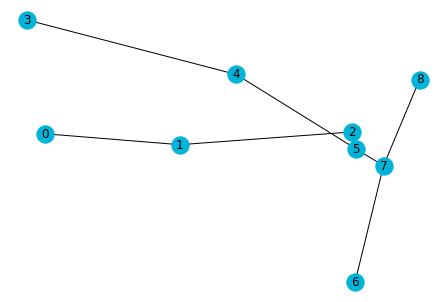

In [38]:
# que en nuestro grafo usamos para posicionar los nodos. Agreguemos también algo de color ...
nx.draw(G,pos, with_labels=True, node_color='#00b4d9')

Comparen este grafo con la red de subterráneos de la Ciudad de Buenos Aires. Ya empieza a haber un poco más de similitud no? Agreguemos algunos estilos adicionales para terminar de darle forma ...

In [39]:
# primero con el nombre de las estaciones
lab = nx.get_node_attributes(G,'estacion')

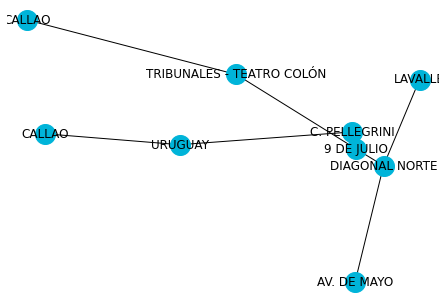

In [40]:
nx.draw(G,pos, labels=lab, with_labels=True, node_size=400, node_color='#00b4d9')

Ya con el nombre de las estaciones podemos ver qué es lo que estamos queriendo representar. Un grafo donde las líneas están representadas por estaciones que se unen consecutivamente, pero que a la vez, cuentan con ejes que las conectan entre sí. Evitando que las líneas se encuentren aisladas y que el grafo termine de completarse. Veamos cómo podríamos hacer para asignarle un color a los nodos en función de su pertenencia a cada una de las líneas.

In [41]:
# podríamos seguir usando el método `get_node_attributes`
color_dict = nx.get_node_attributes(G,'color')

In [42]:
# lo que hace el camino un poco más largo
colors = []
for n,c in color_dict.items():
    colors.append(c)

In [43]:
colors

['red', 'red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue']

In [44]:
# o tambien haber usado una comprehension list
colores = [i[1]['color'] for i in G.nodes(data=True)]

In [45]:
colors

['red', 'red', 'red', 'green', 'green', 'green', 'blue', 'blue', 'blue']

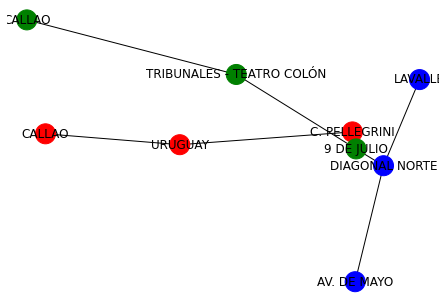

In [46]:
nx.draw(G,pos, labels=lab, with_labels=True, node_size=400, node_color=colors)

Tanto los colores como los pesos se asignan por medio de listas, respetando el orden de los componentes (nodos o ejes) dentro del grafo. Veamoslo cómo sería aplicado a la medida de peso que agregamos recientemente, la cantidad de pasajeros. Veamos cómo queda.

In [47]:
# asignamos el color amarillo a las conexiones intensas
ec = ['yellow' if G[u][v]['pasajeros'] > 100 else 'lightgrey' for u,v in G.edges()]

In [48]:
# y definimos el parametro peso a partir del atributo pasajeros para visualizar
ew = [G[n][d]['pasajeros']/5 for n,d in G.edges()]

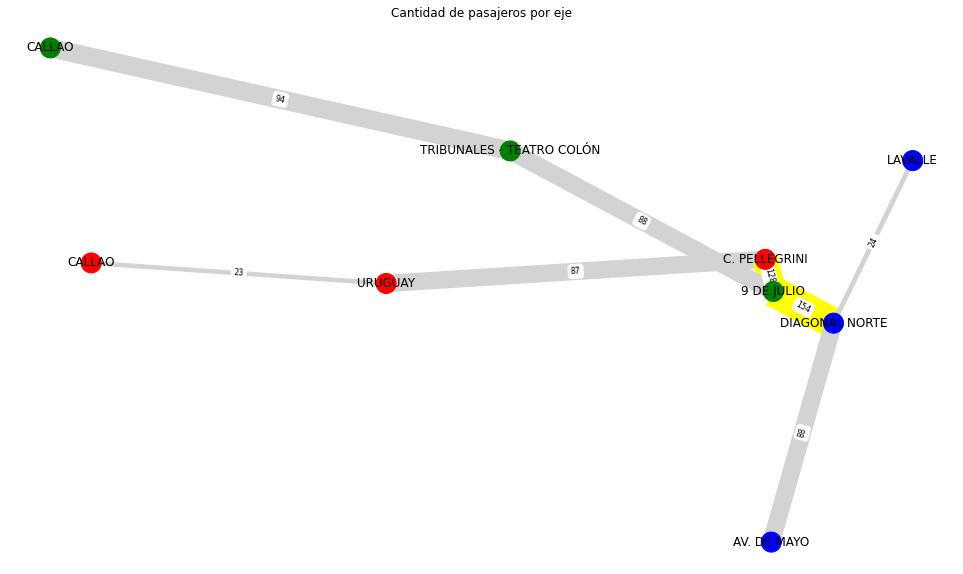

In [49]:
# con el método `subplots` de matplotlib creamos el eje y la figura donde se almacena
fig, ax = plt.subplots(figsize=(17,10))

# dicho eje lo podemos pasar como parámetro al método `draw`
nx.draw(G,pos, labels=lab, with_labels=True, 
        node_size=400, node_color=colors,
        edge_color = ec, width = ew, ax=ax)

# agregamos etiquetas a los ejes
edge_labels = nx.get_edge_attributes(G, 'pasajeros')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

ax.set_title('Cantidad de pasajeros por eje');

También podríamos graduar los ejes con una leyenda que indique la cantidad de pasajeros, en lugar de usar una etiqueta. Esto con el módulo `cm` de matplotlib.

In [50]:
from matplotlib import cm

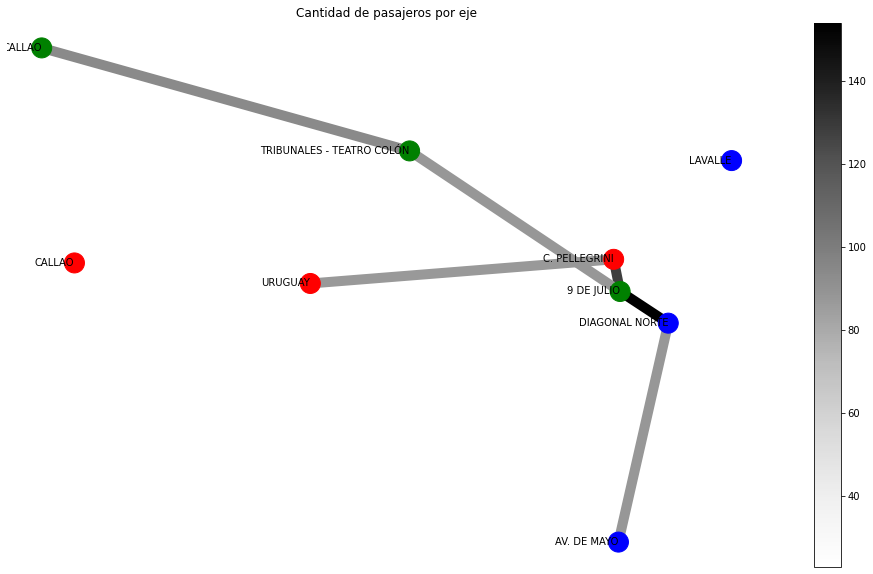

In [51]:
fig, ax = plt.subplots(figsize=(17,10))

ec=[G[u][v]['pasajeros'] for u, v in G.edges]

mcl = nx.draw_networkx_edges(G, pos, edge_cmap=cm.Greys, width=10,edge_color=ec)

nx.draw_networkx_nodes(G, pos, node_size=400, node_color=colors, ax=ax)
nx.draw_networkx_labels(G, pos, labels=lab, font_size=10, 
                        horizontalalignment='right', ax=ax)

plt.colorbar(mcl)
ax.set_axis_off()
ax.set_title('Cantidad de pasajeros por eje');

### 1.2. Tipos de grafos

En el grafo que venimos construyendo como ejemplo no hemos incluído una cuestión central. Si bien pudimos diferenciar nodos a partir de conexiones representadas por cantidad de pasajeros, nunca especificamos en qué dirección se daba tal magnitud. 

Dado que estamos representado viajes en una red de subterráneos, los pasajeros podrían haber ido de una estación a otra, o vicebersa. Introducimos así otra cuestión de mucha relevancia a la hora de trabajar con redes de transporte: `la direccionalidad`

`NetworkX` [cuenta con varias clases](https://networkx.org/documentation/stable//reference/classes/index.html) para poder representar el sentido de las conexiones entre nodos. En este sentido, es importante aclarar que, a grandes rasgos, contamos con dos familias de grafos. Los dirigidos y los no dirigidos:

<img align="center" width="800" height="40" src="../imagenes/grafos_tipo.png" style="float: center; padding: 0 15px">

In [52]:
# Veamos qué tipo de grafo es el que construimos previamente
type(G)

networkx.classes.graph.Graph

Tal como se puede apreciar, este es un grafo no dirigido. Es decir, ningún tipo de direccionalidad se ve representada. O al menos no es explícita, con lo cual la conexión entre nodos se da en ambos sentidos de la red. 

Ahora, antes de seguir con nuestro ejemplo, exploremos brevemente qué alternativas tenemos para representar relaciones en distintos tipos de grafos con `NetworkX`.

#### 1.2.1. Grafos dirigidos

La principal característica de un grafo dirigido radica en el sentido de la relación entre nodos. Algo bastante central en las redes de transporte. La clase `DiGraph` de NetworkX permite construir grafos con ejes dirigidos, con la única restricción de no incluir [ejes paralelos o múltiples](https://es.wikipedia.org/wiki/Aristas_m%C3%BAltiples#:~:text=En%20teor%C3%ADa%20de%20grafos%2C%20las,m%C3%BAltiples%20son%20llamados%20grafos%20simples.).

Existen varias maneras de poblar un objeto de tipo `DiGraph`, ya sea agregando nodos singularmente o a partir de colecciones como listas. También es posible especificar directamente los ejes como mostramos a continuación:

In [53]:
# Grafo dirigido
D = nx.DiGraph()
D.add_edge(0,1)
type(D)

networkx.classes.digraph.DiGraph

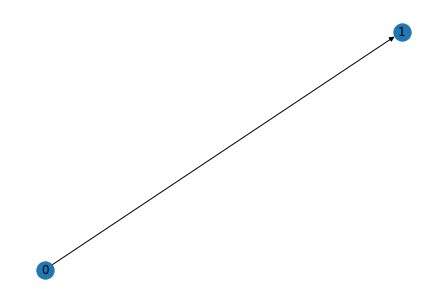

In [54]:
nx.draw(D, with_labels=True)

Tal y como mencionamos, este tipo de grafos no soportan los ejes paralelos. Comprobémoslo ...

In [55]:
D.add_edges_from([(0,1),(1,0)])

In [56]:
# al no ser un multigrafo, las conexiones entre el mismo par de nodos se cuentan sólo una vez!
D.number_of_edges(u=0,v=1)

1

Así, contamos en total con ...

In [57]:
# dos grupos de conexiones
D.number_of_edges()

2

Porque recordemos, es un grafo dirigido. Entonces, la direccionalidad importa ...

In [58]:
# no es lo mismo ir de 1 a 0 que de 0 a 1
D.number_of_edges(u=1,v=0)

1

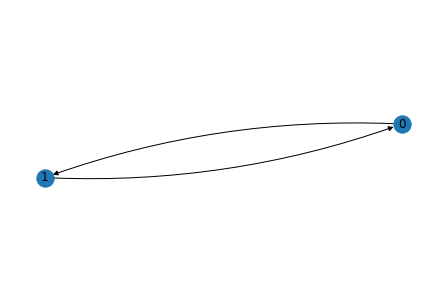

In [59]:
# graficamente se entiende mejor
nx.draw(D, with_labels=True, arrows=True, connectionstyle='arc3, rad = 0.1')

La intención de este segmento no es adentrarnos en detalle en los tipos de grafos. Sino más bien presentarlos y tener una idea del tipo de relaciones que cada uno permite representar. A los que les interese ahora un poco más, la documentación oficial es bastante clara y accesible. En el siguiente hipervínculo podrán encontrar más sobre [grafos dirigidos](https://networkx.org/documentation/stable//reference/classes/digraph.html#networkx.DiGraph) 

#### 1.2.2. Multigrafos o grafos multiejes

Como primer gran distinción, en teoría de grafos podemos hablar de `grafos simples` o `multigrafos`. [Estos últimos](https://es.wikipedia.org/wiki/Multigrafo) pueden tener más de un eje o arista conectando los mismos nodos (lo que dijimos, nuestro `D` no soportaba). Algo bastante útil si pensamos, por ejemplo, en una red de calles donde los nodos estén representados por el cruce de las mismas.

Para este tipo de situaciones, NetworkX cuenta con la clase `MultiGraph` que permite trabajar con conexiones no dirigidas entre nodos relacionados por más de una arista. [Acá](https://networkx.org/documentation/stable//reference/classes/multigraph.html#networkx.MultiGraph) el link a la documentación.

In [60]:
# Instanciamos un grafo no dirigido con ejes múltiples 
M = nx.MultiGraph()
type(M)

networkx.classes.multigraph.MultiGraph

In [61]:
# y lo poblamocs con nodos y ejes
M.add_nodes_from([0,1])
M.add_edge(0,1)
M.add_edge(0,1);

A diferencia del grafo dirigido, aca vemos que la relación entre el mismo par de nodos se cuenta tantas veces como la agreguemos con el método `add_edge` o `add_edge_from`. 

In [62]:
# Ahora contamos con más de una conexión entre el mismo par de nodos!
M.number_of_edges()

2

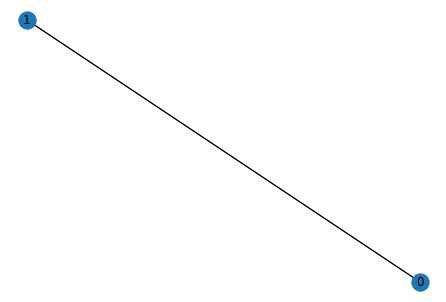

In [63]:
nx.draw(M, with_labels=True)

Lamentablemente, NetworkX no soporta la representación de ejes paralelos. Más específicamente, el método `draw`. Si bien el grafo puede instanciarse con `múltiples` conexiones, como así también con `selfloops`, los ejes se dibujan como trazas simples (por eso verán que se superponen en el ejemplo anterior). Las funcionalidades para plotear que provee NetworkX son básicas dado que, como se sugiere [desde la misma librería](https://networkx.org/documentation/stable/reference/drawing.html) el principal objetivo es el análisis de grafos antes que si visualización. Para la representación de multigrafos no dirigidos, se pueden explorar otras librerías como [graphviz](https://www.graphviz.org/gallery/) y [pygraphviz](https://pygraphviz.github.io/documentation/stable/install.html), las cuales cuentan ya con [algunos métodos](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.nx_agraph) que por el momento son soportados pero que no abordaremos en el presente notebook.

Agreguemos ahora algunas conexiones más para poder comparar nuestro multigrafo con el grafo dirigido que instanciamos previamente:

In [64]:
# agregamos dos nuevas conexiones, entre 1 y 0 y 1 consigo mismo
M.add_edge(1,0)
M.add_edge(1,1);

In [65]:
# vemos que a diferencia del grafo dirigido, el multigrafo si contempla los ejes mútliples
M.number_of_edges()

4

In [66]:
# sin importar la direccionalidad de la relación
M.number_of_edges(u=0, v=1)

3

In [67]:
# por eso, la cantidad de ejes entre 0 y 1 o entre 1 y 0 es la misma
M.number_of_edges(u=1, v=0)

3

Acá introducimos un nuevo concepto: los `selfloops`. Con `draw` tampoco podemos representarlos en un multigrafo no dirigido. Sin embargo, podemos ver con el método `number_of_selfoops` que el grafo que instanciamos con anterioridad contiene al menos uno. Por el momento sólo presentemos este concepto, en breve ya agregarmos algunos detalles ...

In [68]:
# los selfloops podemos identificarlos de esta manera
M.number_of_edges(u=1, v=1)

1

In [69]:
# o con el método que mencionamos recientemente
nx.number_of_selfloops(M)

1

#### 1.2.3. Multigrafos dirigidos

Al igual que la anterior, esta clase contempla tanto ejes paralelos como selfloops. Ahora, con la posibilidad de darle direccionalidad a dichas conexiones.Acá el [hipervínculo a la documentación](https://networkx.org/documentation/stable//reference/classes/multidigraph.html).

In [70]:
MD = nx.MultiDiGraph([(0,1),(0,1),(1,0),(1,1)])
type(MD)

networkx.classes.multidigraph.MultiDiGraph

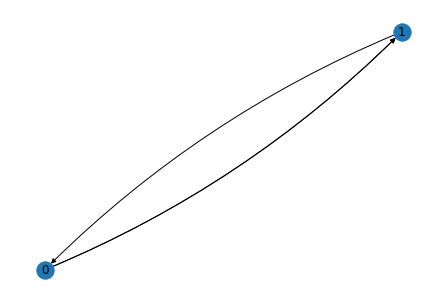

In [71]:
nx.draw(MD, with_labels=True, arrows=True, connectionstyle='arc3, rad = 0.1')

La representación de multigrafos dirigidos no son una excepción. Lamentablemente, su visualización padece del mismo defecto que los multigrafos dirigidos. Es decir, los ejes múltiples se trazan como simples. Revisemos, sin embargo, cómo son contabilizados.

In [72]:
# nuestro multigrafo dirigido tiene 4 ejes,
MD.number_of_edges()

4

In [73]:
# de los cuales 2 son en dirección 0 -> 1
MD.number_of_edges(u=0, v=1)

2

In [74]:
# 1 en dirección inversa (1 -> 0)
MD.number_of_edges(u=1, v=0)

1

In [75]:
# y por último un selfloop
MD.number_of_edges(u=1, v=1)

1

Tal y como vimos con el grafo dirigido, los ejes son representados considerando el orden de los nodos que son conectados. Es decir, un multigrafo dirigido agrega la posibilidad de trabajar con ejes paralelos contemplando direccionalidad (algo que los grafos dirigidos simples no permiten).

## **Ejercitación**

Ahora que vimos todas las clases de NetworkX para trabajar con distintos tipos de grafos, cuál creen ustedes que es la mejor representación para nuestro ejemplo de subtes? Recuerden que conectamos algunas estaciones de la red detallando el volumen de pasajeros entre ambas. Vale aclarar también que no hay una única respuesta para este ejercicio. 

In [76]:
# Desarrollar ejercicio

### Solución

##### a. Asignando direcciones de sentido único
Una posibilidad hubiese sido mantener el mismo número de pasajeros, modificando la dirección de cada una de las conexiones que diseñamos inicialmente. De la siguiente forma:

In [77]:
# convertimos el grafo a dirigido
GD = G.to_directed()

In [78]:
# al explicitar la direccionalidad, esto duplica la cantidad de ejes manteniendo la misma metadata
GD.edges()

OutEdgeView([(0, 1), (1, 0), (1, 2), (2, 1), (2, 5), (3, 4), (4, 3), (4, 5), (5, 4), (5, 2), (5, 7), (6, 7), (7, 6), (7, 8), (7, 5), (8, 7)])

In [79]:
# aca vamos a guardar los ejes invertidos
dirigidos = {}

for e in GD.edges():
    # invertimos la tupla 
    reversed_item = (e[1],e[0])
    
    # verificamos si el item invertido ya existe
    if reversed_item in GD.edges():
        dirigidos[e] = (reversed_item)
    
    # y lo borramos del diccionario si esta repetido
    if (e in dirigidos.keys()) and (e in dirigidos.values()):  
        print('Borra: {}'.format(e))
        del dirigidos[e]

Borra: (1, 0)
Borra: (2, 1)
Borra: (4, 3)
Borra: (5, 4)
Borra: (5, 2)
Borra: (7, 6)
Borra: (7, 5)
Borra: (8, 7)


In [80]:
# ahora, tenemos que elegir entre alguno de estos pares dirigidos
dirigidos

{(0, 1): (1, 0),
 (1, 2): (2, 1),
 (2, 5): (5, 2),
 (3, 4): (4, 3),
 (4, 5): (5, 4),
 (5, 7): (7, 5),
 (6, 7): (7, 6),
 (7, 8): (8, 7)}

In [81]:
borrar = []

for k,v in dirigidos.items():
    # elegimos un par de nodos aleatoriamente
    seleccionado = random.sample([k,v],1)[0]
    borrar.append(seleccionado)

# y los removemos del grafo    
[GD.remove_edge(i[0],i[1]) for i in borrar];

In [82]:
borrar

[(1, 0), (2, 1), (2, 5), (4, 3), (4, 5), (7, 5), (6, 7), (7, 8)]

In [83]:
GD.edges()

OutEdgeView([(0, 1), (1, 2), (3, 4), (5, 4), (5, 2), (5, 7), (7, 6), (8, 7)])

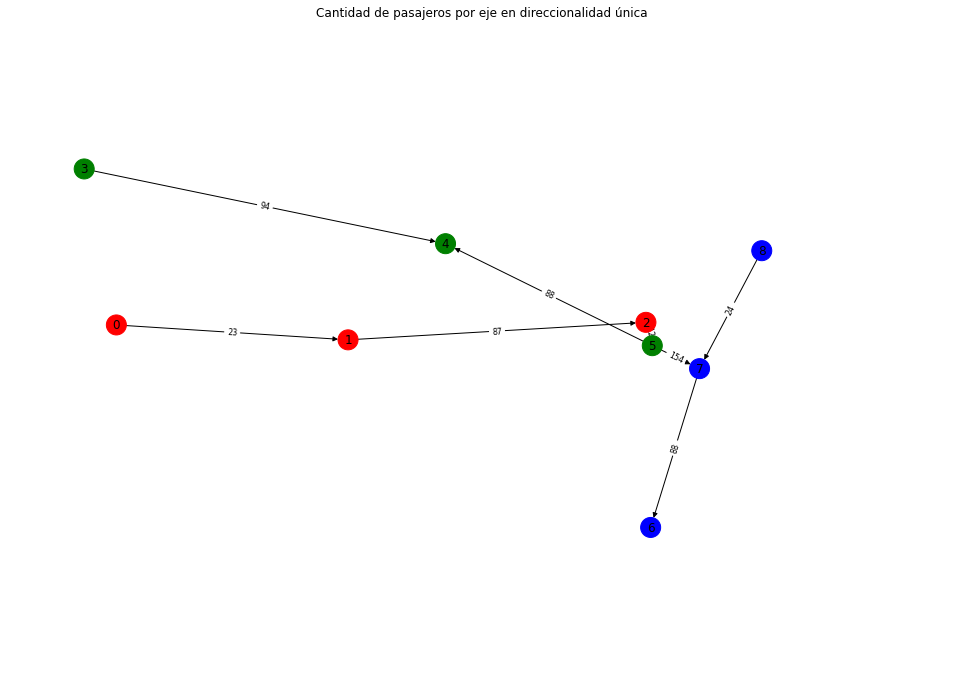

In [84]:
# y visualizamos el grafo dirigido
fig, ax = plt.subplots(figsize=(17,12))
nx.draw(GD,pos, with_labels=True, node_size=400, node_color=colors, ax=ax)

# agregamos etiquetas a los ejes
edge_labels = nx.get_edge_attributes(G, 'pasajeros')
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

ax.set_title('Cantidad de pasajeros por eje en direccionalidad única');

##### b. Asignando direcciones en sentido doble (ida y vuelta)
Otra posibilidad, hubiese sido distribuir la cantidad de pasajeros existentes en direcciones múltiples. Es decir, distribuir el flujo de pasajeros entre dos ejes simultáneos. Veamos cómo ...

In [85]:
GDD = G.to_directed()

In [86]:
dirigidos = {}

for e in GDD.edges():
    dirigidos[e] = GDD.edges[e]['pasajeros']/2

In [87]:
dirigidos

{(0, 1): 11.5,
 (1, 0): 11.5,
 (1, 2): 43.5,
 (2, 1): 43.5,
 (2, 5): 64.0,
 (3, 4): 47.0,
 (4, 3): 47.0,
 (4, 5): 44.0,
 (5, 4): 44.0,
 (5, 2): 64.0,
 (5, 7): 77.0,
 (6, 7): 44.0,
 (7, 6): 44.0,
 (7, 8): 12.0,
 (7, 5): 77.0,
 (8, 7): 12.0}

In [88]:
redondear = {}

for uv, attr in dirigidos.items():
    if attr not in redondear:
        redondear[attr] = [uv]
    else:
        redondear[attr].append(uv)

In [89]:
redondear

{11.5: [(0, 1), (1, 0)],
 43.5: [(1, 2), (2, 1)],
 64.0: [(2, 5), (5, 2)],
 47.0: [(3, 4), (4, 3)],
 44.0: [(4, 5), (5, 4), (6, 7), (7, 6)],
 77.0: [(5, 7), (7, 5)],
 12.0: [(7, 8), (8, 7)]}

In [90]:
import numpy as np

In [91]:
def redondea(pasajeros,resto,eje1,eje2):
    d = {}
    entero = np.ceil(resto)
    sin_decimal = int(pasajeros)
    pasajero_adicional = sin_decimal+entero
    
    eje_seleccionado = random.sample([eje1,eje2],1)[0]
    
    d[eje_seleccionado] = int(pasajero_adicional)
    
    if eje_seleccionado == eje1:
        d[eje2] = int(sin_decimal)
    else:
        d[eje1] = int(sin_decimal)
    return d

In [92]:
redondeados = []
for k in redondear.keys():
    resto = (k - int(k))
    if resto > 0:
        pasajeros = k
        eje1 = redondear[k][0]
        eje2 = redondear[k][1]
        redondeados.append(redondea(pasajeros,resto,eje1,eje2))        

In [93]:
reemplazos = {}
[reemplazos.update(d) for d in redondeados];

In [94]:
dirigidos.update(reemplazos) 

In [95]:
for k,v in dirigidos.items():
    GDD.edges[k[0],k[1]]['pasajeros'] = int(v)

In [96]:
[GDD[u][v]['pasajeros'] for u,v in GDD.edges()]

[11, 12, 43, 44, 64, 47, 47, 44, 44, 64, 77, 44, 44, 12, 77, 12]

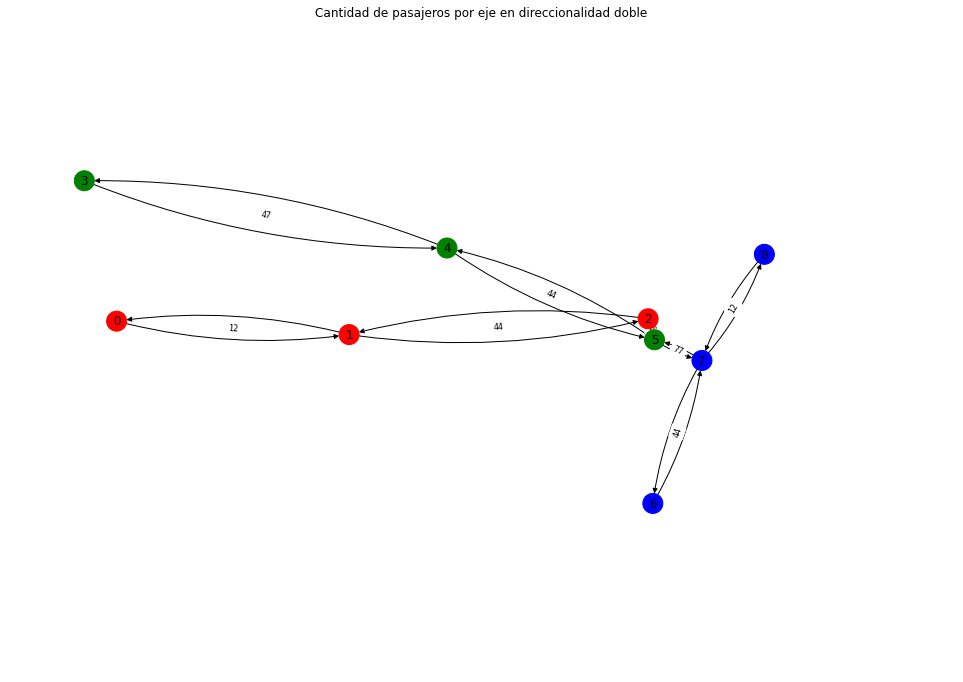

In [97]:
# y visualizamos el grafo dirigido
fig, ax = plt.subplots(figsize=(17,12))
nx.draw(GDD, pos, with_labels=True, arrows=True, connectionstyle='arc3, rad = 0.1', 
        node_size=400, node_color=colors, ax=ax)

ax.set_title('Cantidad de pasajeros por eje en direccionalidad doble')

edge_labels = nx.get_edge_attributes(GDD, 'pasajeros')
nx.draw_networkx_edge_labels(GDD, pos, edge_labels, font_size=8);

In [98]:
# prestemos atención al tipo de grafo
type(GDD)

networkx.classes.digraph.DiGraph

Recuerdan que dijimos que los grafos dirigidos no soportaban ejes múltiples? Entonces ...

In [99]:
# la cantidad de conexiones entre un par de nodos
GDD.number_of_edges(u=1, v=0)

1

In [100]:
# y su ordenamiento inverso , será idéntica. Es decir, nuestro grafo no considera ejes múltiples
GDD.number_of_edges(u=0, v=1)

1

Una solución a esto, podría haber sido instanciar un multigrafo y poblarlo desde cero con nuestras conexiones. Ahora bien, esto no hubiera solucionado nuestro problema de representatividad . Es decir, el método `draw` seguiría representado sólo un valor entre arcos (no veríamos etiquetas de ida o vuelta, solamente una de ellas). Y esto, porque como mencionamos, los ejes múltiples se trazan como simples.

Algo para *salir del paso*, hubiese sido valernos de nuestras posiciones y plotear las etiquetas directamente con el método [annotate](https://matplotlib.org/stable/tutorials/text/annotations.html) de `matplotlib`. No es algo muy recomendable, pero dadas las limitaciones para visualizar ejes múltiples, no deja de ser una alternativa por fuera de instalar `graphviz`...

In [101]:
# instanciamos de nuevo las etiquetas
edge_labels = nx.get_edge_attributes(GDD, 'pasajeros')

In [102]:
# y asignamos su posición en un punto intermedio entre los nodos del diccionario de posiciones 'pos'
p = {}

for k,v in pos.items():
    
    try:
        lon = ((pos[k][0]+pos[k+1][0])/2)-0.0001 # nos movemos ligeramente en sentido contrario al eje x
        lat = (pos[k][1]+pos[k+1][1])/2
        p[(k,k+1)] = (lon,lat)
    except:
        pass
    
    if k >= 2 and k+1 <= 3:
        del p[k,k+1]
        lon = ((pos[k][0]+pos[k+3][0])/2)-0.0001
        lat = (pos[k][1]+pos[k+3][1])/2
        p[(k,k+3)] = (lon,lat)
        
    elif k >= 5 and k+1 <= 6:
        del p[k,k+1]
        lon = ((pos[k][0]+pos[k+2][0])/2)-0.0001
        lat = (pos[k][1]+pos[k+2][1])/2
        p[(k,k+2)] = (lon,lat)
        
    else:
        pass

In [103]:
# aca nuestras nuevas ubicaciones
p

{(0, 1): (-58.389955297707104, -34.6038993856253),
 (1, 2): (-58.38410549034086, -34.6038653291437),
 (2, 5): (-58.38074459501526, -34.6039411540723),
 (3, 4): (-58.38923376988701, -34.6006133587792),
 (4, 5): (-58.382958350845456, -34.60291618405115),
 (5, 7): (-58.38015216148175, -34.60454447143845),
 (6, 7): (-58.3801703490159, -34.60691352739835),
 (7, 8): (-58.37894288144915, -34.6033068314627)}

In [104]:
# modificamos las posiciones para que no se superpongan
for k,v in edge_labels.items():
    edge_labels[k] = [v]
    if k in p.keys():
        coords = p[k[0],k[1]]
        delta_coords = (coords[0]+0.0001,coords[1]-0.0005) # movemos ligeramente x e y 
        edge_labels[k].append(delta_coords)
    
    elif k not in p.keys():
        coords = p[k[1],k[0]]
        delta_coords = (coords[0]-0.0001,coords[1]+0.0005) # en sentido contrario!
        edge_labels[k].append(delta_coords)

In [105]:
edge_labels

{(0, 1): [11, (-58.3898552977071, -34.6043993856253)],
 (1, 0): [12, (-58.39005529770711, -34.603399385625295)],
 (1, 2): [43, (-58.384005490340854, -34.604365329143704)],
 (2, 1): [44, (-58.38420549034086, -34.6033653291437)],
 (2, 5): [64, (-58.380644595015255, -34.604441154072305)],
 (3, 4): [47, (-58.389133769887, -34.6011133587792)],
 (4, 3): [47, (-58.38933376988701, -34.6001133587792)],
 (4, 5): [44, (-58.38285835084545, -34.603416184051156)],
 (5, 4): [44, (-58.38305835084546, -34.60241618405115)],
 (5, 2): [64, (-58.38084459501526, -34.6034411540723)],
 (5, 7): [77, (-58.38005216148175, -34.605044471438454)],
 (6, 7): [44, (-58.380070349015895, -34.60741352739835)],
 (7, 6): [44, (-58.3802703490159, -34.606413527398345)],
 (7, 8): [12, (-58.378842881449145, -34.603806831462705)],
 (7, 5): [77, (-58.380252161481756, -34.60404447143845)],
 (8, 7): [12, (-58.37904288144915, -34.6028068314627)]}

In [106]:
# y creamos una funcion para poder plotear con distintas alternativas 
def plotea_dilabels(names, label_color, alignement):

    fig, ax = plt.subplots(figsize=(17,12))
    nx.draw(GDD, pos, arrows=True, connectionstyle='arc3, rad = 0.05', 
            node_size=400, node_color=colors, ax=ax)

    nx.draw_networkx_labels(GDD, pos, 
                            labels=names, 
                            font_size=10, 
                            font_color=label_color,
                            horizontalalignment=alignement, 
                            alpha=0.8,
                            ax=ax)

    ax.set_title('Cantidad de pasajeros por eje en direccionalidad doble')


    for k, v in edge_labels.items():
        ax.annotate(text = edge_labels[k][0],
                    xy=edge_labels[k][1]);

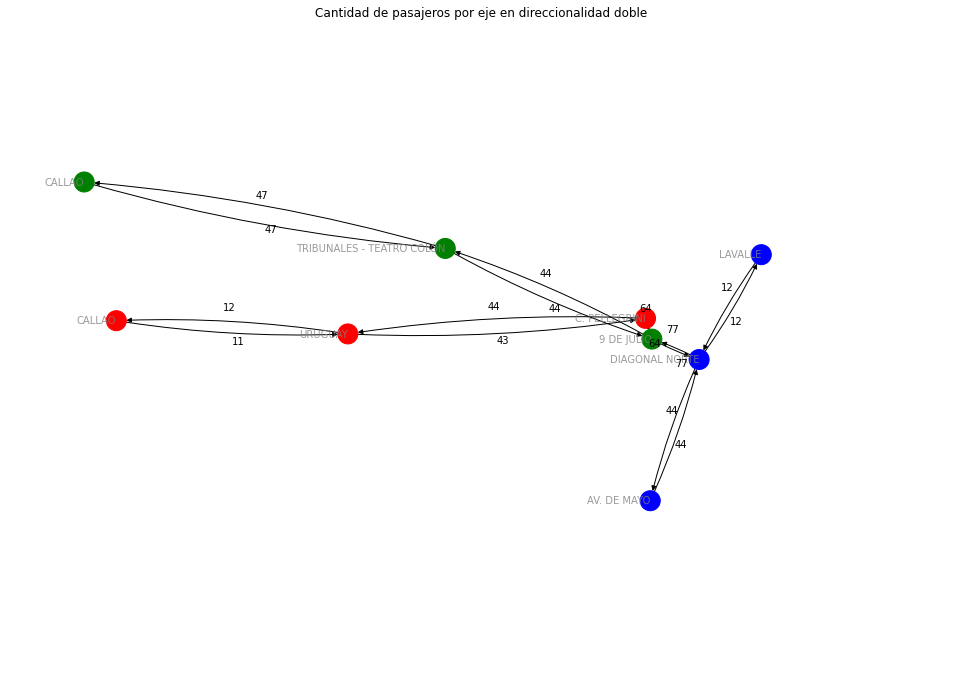

In [107]:
# primero, usando los nombres de las estaciones
plotea_dilabels(names=lab, label_color='grey', alignement='right')

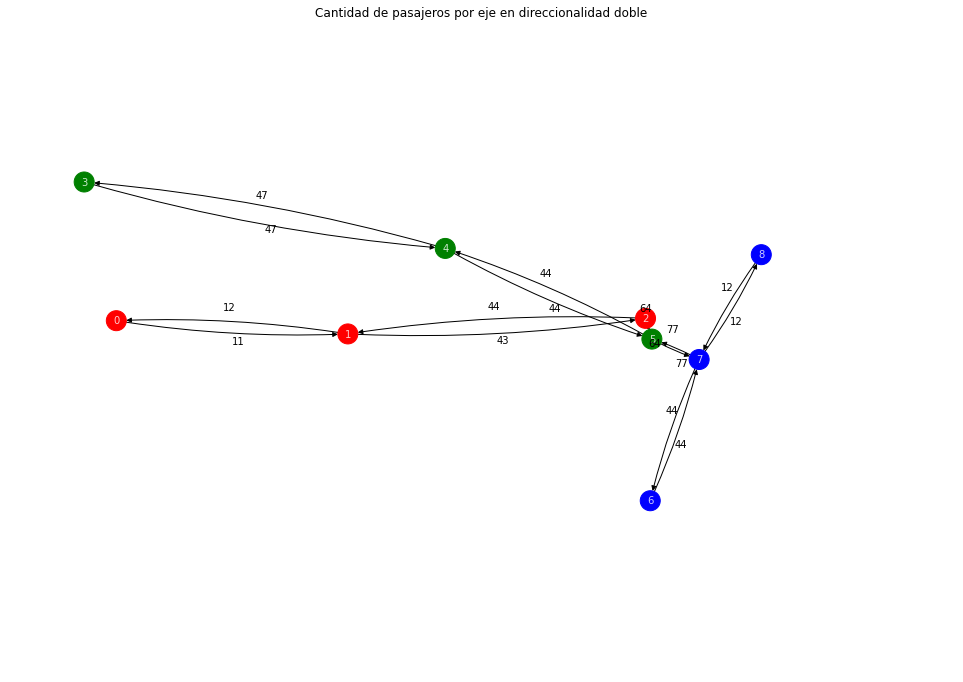

In [108]:
# o viendo el id del nodo
plotea_dilabels(names=None, label_color='white', alignement='center')

### 1. 3. Selfloops

Otro aspecto que vimos, algunas clases soportaban y otras no, eran los self-loops. Esto no es otra cosa que un nodo conectándose consigo mismo. Veámos con qué métodos y alternativas contamos para detectar este tipo de conexiones en un grafo ...

In [109]:
# Como encontrar self loops?

def find_selfloop_node(G):
    '''
    Encontrar nodos con self-loops en un grafo determinado
    '''
    
    nodes_in_selfloops = []
    
    # Iterar sobre todos los ejes de G
    for u,v in G.edges():
        
        # Chequear si el nodo u y el nodo v son iguales:
        if u == v:
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

In [110]:
# Usemos un grafo para el que sabemos tenemos self loops
len(find_selfloop_node(MD))

1

In [111]:
# Veamos si nos devuelve error
assert nx.number_of_selfloops(MD) != len(find_selfloop_node(MD))

AssertionError: 

In [112]:
# y, efectivamente, el assert nos devuelve error porque los valores no son distintos. Tenemos 1 self-loop!
nx.number_of_selfloops(MD)

1

### 1.4. Matrices de adyacencia

Las matrices de adyacencia son un concepto muy útil en grafos, más si lo encaramos desde la perspectiva de redes de transporte. Esencialmente porque este tipo de matrices indican con `1` si existe conexión entre un par de nodos y con `0` para lo contrario.

In [113]:
G.nodes(data=True)

NodeDataView({0: {'estacion': 'CALLAO', 'linea': 'B', 'color': 'red', 'coord': (-58.39241446187341, -34.603705218144896)}, 1: {'estacion': 'URUGUAY', 'linea': 'B', 'color': 'red', 'coord': (-58.3872961335408, -34.6040935531057)}, 2: {'estacion': 'C. PELLEGRINI', 'linea': 'B', 'color': 'red', 'coord': (-58.3807148471409, -34.6036371051817)}, 3: {'estacion': 'CALLAO', 'linea': 'D', 'color': 'green', 'coord': (-58.3931251809727, -34.599639552419)}, 4: {'estacion': 'TRIBUNALES - TEATRO COLÓN', 'linea': 'D', 'color': 'green', 'coord': (-58.3851423588013, -34.6015871651394)}, 5: {'estacion': '9 DE JULIO', 'linea': 'D', 'color': 'green', 'coord': (-58.3805743428896, -34.6042452029629)}, 6: {'estacion': 'AV. DE MAYO', 'linea': 'C', 'color': 'blue', 'coord': (-58.3806107179579, -34.6089833148827)}, 7: {'estacion': 'DIAGONAL NORTE', 'linea': 'C', 'color': 'blue', 'coord': (-58.3795299800739, -34.604843739914)}, 8: {'estacion': 'LAVALLE', 'linea': 'C', 'color': 'blue', 'coord': (-58.3781557828244

In [114]:
# Convertimos a G en una matriz (1 indica si hay edge entre nodos)
A = nx.to_numpy_matrix(G)

In [115]:
A

matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [116]:
# también podemos ir en el sentido inverso, convertir la matriz en un grafo
A_conv = nx.from_numpy_matrix(A, create_using=nx.Graph())

In [117]:
# Veamos si seguimos teniendo el atributo 'pasajeros'
for n, d in A_conv.nodes(data=True):
    assert 'pasajeros' not in d.keys()

In [118]:
# cuando pasamos de matriz a grafo, perdemos la metadata
A_conv.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}})

Una herramienta bastante interesante para visualizar estas matrices es el método `MatrixPlot` de la librería [nxviz](https://github.com/ericmjl/nxviz). Esta permite expandirse un poco más allá de las limitaciones que mencionamos anteriormente. Uno de los principales contribuyentes es el desarrollador de NetworkX, [Eric Ma](https://github.com/ericmjl). Veamos un breve ejemplo.

In [119]:
#!pip install nxviz

In [120]:
import nxviz as nv

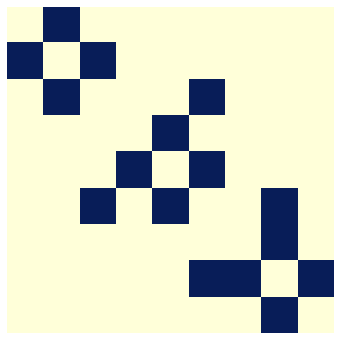

In [121]:
Ac = nv.MatrixPlot(A_conv)
Ac.draw()
plt.show()

## Sección 2: Métricas de un grafo

Como vimos, un grafo se compone por nodos y enlaces que los conectan. Al mismo tiempo, entendimos que la manera en la que estos se vinculan define varios tipos de grafos. 

Asimismo, es importante remarcar que para describir una red, los grafos cuentan con distintas métricas. Todas ellas, detallan la manera en la que los nodos se encuentran conectados. De allí, la importancia del tipo de grafo que elijamos para representar una red determinada. 

En otras palabras, las métricas de una red también se encuentran sujetas al tipo de grafo que hayamos elegido para representarla. No es lo mismo describir relaciones simétricas sin un sentido definido que otras que sí lo tienen. Por lo tanto, seguiremos trabajando bajo la idea de grafos dirigidos y no dirigidos. 

Veamos cómo esto incide en la manera de caracterizar cuantitativamente un grafo.

### 2.1. Node degree

Una métrica esencial para describir una red es el [grado de un nodo](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html). Este puede definirse como el número de ejes adyacentes a un nodo. 

También se puede hablar del grado ponderado de un nodo. Si, por ejemplo, nuestra ponderación se apoyara en la cantidad de pasajeros que guardamos como atributo del eje, el grado ponderado sería la suma de todos esos pasajeros (o pesos) que inciden en el nodo en cuestión. 

Otra cuestión relevante para definir el grado de un nodo es el tipo del grafo. Si trabajamos con direccionalidad, es importante remarcar que el grado será la suma de las conexiones entrantes y salientes, como se puede apreciar a continuación ...

<img align="center" width="2500" height="20" src="../imagenes/distribucion_grados.png" style="float: center; padding: 0 15px">

In [122]:
# retomemos nuestro grafo no dirigido inicial
type(G)

networkx.classes.graph.Graph

In [123]:
# por ejemplo, el nodo 7 se conecta simétricamente con los nodos 5, 6 y 8
G.nodes(), G.edges()

(NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8)),
 EdgeView([(0, 1), (1, 2), (2, 5), (3, 4), (4, 5), (5, 7), (6, 7), (7, 8)]))

In [124]:
# con lo cual sabemos que es un nodo de grado 3
G.degree[7]

3

In [125]:
# así también podemos ver los grados de todos los nodos en el grafo
list(G.degree(G.nodes()))

[(0, 1), (1, 2), (2, 2), (3, 1), (4, 2), (5, 3), (6, 1), (7, 3), (8, 1)]

In [126]:
# y si estuviésemos trabajando con un grafo dirigido
type(GDD)

networkx.classes.digraph.DiGraph

In [127]:
# deberíamos interpretar que de izquierda a derecha la relación es un out, mientras que a la inversa es un indegree
GDD.nodes(), GDD.edges()

(NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8)),
 OutEdgeView([(0, 1), (1, 0), (1, 2), (2, 1), (2, 5), (3, 4), (4, 3), (4, 5), (5, 4), (5, 2), (5, 7), (6, 7), (7, 6), (7, 8), (7, 5), (8, 7)]))

In [128]:
# por ejemplo, el 7 tiene 3 relaciones salientes y 3 entrantes
GDD.degree[7]

6

In [129]:
list(GDD.degree(GDD.nodes()))

[(0, 2), (1, 4), (2, 4), (3, 2), (4, 4), (5, 6), (6, 2), (7, 6), (8, 2)]

### 2.2. Grado promedio de una red

Ahora, no hablaremos de los componentes de la red. Sino, de la red misma. Es decir, el grado promedio es una medida de conectividad de la red que indica, en promedio, con cuántos vecinos conecta un nodo dentro de la red.

<img align="center" width="2500" height="20" src="../imagenes/grado_promedio_red.png" style="float: center; padding: 0 15px">

Para un grafo no dirigido, podríamos decir que el grado promedio es igual a la suma de los grados de todos sus nodos, dividido por la totalidad de nodos en el grafo. La suma de los grados también podría ser interpretada como la cantidad de ejes multiplicada por dos. Dado que estos son simétricos y, por lo tanto, cuentan más de una vez otorgan un grado a cada uno de los dos nodos: de A a B y de B a A. Veamos un ejemplo.

In [130]:
# tenemos 8 ejes conectando 9 nodos
G.number_of_edges(), G.number_of_nodes()

(8, 9)

In [131]:
# o, puesto en otros términos
grados = 0
for n in G.nodes():
    grados += G.degree[n]

In [132]:
# o 16 conexiones o ejes adyacentes entre nuestros 9 nodos
grados

16

In [133]:
# Entonces podríamos calcular el grado promedio multiplicando los ejes simétricamente (como en la fórmula)
np.ceil((2*G.number_of_edges())/G.number_of_nodes())

2.0

In [134]:
# o usando la suma de los grados de los nodos, que sería lo mismo
np.ceil(grados/G.number_of_nodes())

2.0

En cambio, en un grafo dirigido cada eje o enlace representa 1 grado y no dos (como en el no dirigido). Esto porque otorgan un sólo un grado de entrada o salida al nodo (de A a B o de B a A). Por lo tanto, para un grafo dirigido, el grado promedio es simplemente el número de aristas o ejes dividido por el número de vértices o nodos.

In [135]:
np.ceil((GD.number_of_edges())/GD.number_of_nodes())

1.0

¿Y cómo interpretamos esta métrica? Si bien los grafos que estamos usando no fueron estrictamente pensados para su comparabilidad, el grado promedio podría servir para evaluar cuan conectados entre sí se encuentran los componentes de una red. Por ejemplo, en nuestro grafo no dirigido sabemos que, en promedio, cada nodo conecta con casi otros dos. Obviamente porque en un grafo no dirigido las relaciones son recíprocas. Mientras que en el ejemplo dirigido, sabemos que todos los nodos conectan entre sí.  

### 2.3. Degree centrality

El [degree centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html) es una medida de centralidad del nodo en la red. Si el grado del nodo es la cantidad de ejes adyacentes al mismo, esta métrica no indica otra cosa que ese mismo valor expresado en un ratio 0-1. Esto facilita la lectura. Es decir, permite interpretar rápidamente cuan relevante es un nodo en la red sin tener en cuenta la totalidad de conexiones dentro de la misma. En otras palabras, valores cercanos a 1 indican mayor centralidad dentro de la red. 

Esta métrica suele calcularse dividiendo la cantidad de vecinos o grado del nodo por la totalidad de conexiones posibles dentro de la red. Esto es, la cantidad total de ejes dentro del grafo (en el caso que todos los nodos estuviesen conectados con al menos un vecino, es decir ningún nodo aislado) o el total de nodos -1 (es decir, todas las conexiones posibles).

Por lo tanto el grado de centralidad es una medida de relevancia dentro de la red que indica la cantidad de conexiones o vecinos efectivos sobre las que se podría tener. Un `degree centrality` de 0.2 indica que dicho nodo mantiene una conexión efectiva con el 20% del total de conexiones posibles. Veamos cómo calcular esta medida.

In [136]:
# Volviendo a nuestro grafo no dirigido, podemos ver que el nodo 2 tiene dos vecinos
list(G.neighbors(2))

[1, 5]

In [137]:
# lo que equivale a decir que es un nodo de grado 2
G.degree[2]

2

In [138]:
# con una centralidad del 25%, ya sea la calculemos por el total de nodos
G.degree[2]/(G.number_of_nodes()-1)

0.25

In [139]:
# o de ejes ...
G.degree[2]/(G.number_of_edges())

0.25

In [140]:
# Y con el método degree centrality podemos obtener un diccionario con la centralidad de cada nodo
deg_cent = nx.degree_centrality(G)
deg_cent

{0: 0.125,
 1: 0.25,
 2: 0.25,
 3: 0.125,
 4: 0.25,
 5: 0.375,
 6: 0.125,
 7: 0.375,
 8: 0.125}

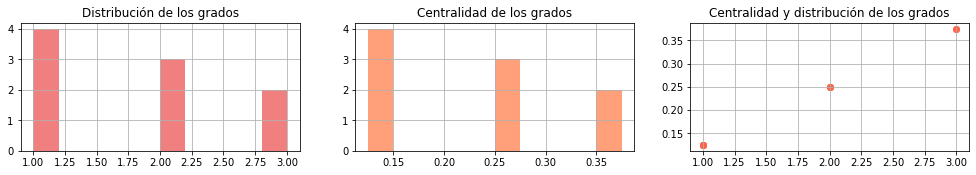

In [141]:
fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)

# Agregamos un histograma con la distribucion de los node degree,
ax1.hist([len(list(G.neighbors(n))) for n in G.nodes()], color='lightcoral')

# un histograma con la distribucion del degree centrality y
ax2.hist(list(deg_cent.values()), color='lightsalmon')

# y un scatter comparando ambos valores
ax3.scatter(x=[G.degree[n] for n in G.nodes()],color='tomato' ,
            y=list(deg_cent.values()))
ax1.set_title('Distribución de los grados')
ax1.grid(True)
ax2.set_title('Centralidad de los grados')
ax2.grid(True)
ax3.set_title('Centralidad y distribución de los grados')
ax3.grid(True);

Con un grafo dirigido, no hubiese sido muy diferente. Siempre teniendo en cuenta la diferencia que se agregan las conexiones entrantes y salientes. Veamos un ejemplo breve ...

In [142]:
# en un grafo dirigido
type(GDD)

networkx.classes.digraph.DiGraph

In [143]:
# seleccionamos arbitrariamente alguno de sus nodod
GDD.edges()

OutEdgeView([(0, 1), (1, 0), (1, 2), (2, 1), (2, 5), (3, 4), (4, 3), (4, 5), (5, 4), (5, 2), (5, 7), (6, 7), (7, 6), (7, 8), (7, 5), (8, 7)])

Es decir, a la hora de determinar el grado del nodo, cuentan tanto los in como los out degree, ambos deben ser sumados. Por ejemplo, el nodo 2 tiene dos vecinos. Pero se conecta con 1 de manera entrante y saliente. De la misma forma, lo hace con 5. Así, el grado del nodo 2 es de 4 conexiones adyacentes.  

In [144]:
# el nodo 2 tiene dos vecinos
list(GDD.neighbors(2))

[1, 5]

In [145]:
# entre ambos alcanza un grado de 4 conexiones adyacentes
GDD.degree(2)

4

In [146]:
# dos entrantes y dos salientes
GDD.in_degree(2) + GDD.out_degree(2) 

4

In [147]:
# lo que le otorga una centralidad de 0.5 dentro del grafo
GDD.degree[2]/(GDD.number_of_nodes()-1)

0.5

...y aca todos los ratios de centralidad para nuestro grafo dirigido. Las estaciones 7 y 5 parecerian ser las de mayor centralidad. Es decir, son nodos centrales dentro de la red!

In [148]:
nx.degree_centrality(GDD)

{0: 0.25, 1: 0.5, 2: 0.5, 3: 0.25, 4: 0.5, 5: 0.75, 6: 0.25, 7: 0.75, 8: 0.25}

## **Ejercitación**

Armar dos funciones que devuelvan:

1. el nodo con degree y degree centrality más altos
2. un nodo según la cantidad deseada de vecinos

In [149]:
# Desarrollar ejercicio

### Solución

##### 1. Nodos por máximo degree y degree centrality 

In [150]:
# Funcion para filtrar nodos según degree y degree centrality
def max_centrality(graph, metric, top_vals):
    """
    Devuelve una lista ordenada de tuplas con los nodos de mayor grado dentro de la red
    """
    
    # establecemos al grado a partir de la cantidad de vecinos
    degree = [(n,graph.degree(n)) for n in graph.nodes()]
    
    # Definimos el denominador
    nodes = graph.number_of_nodes()-1
    
    # y calculamos la centralidad
    centrality = [(n,graph.degree(n)/nodes) for n in graph.nodes()]

    
    if metric == 'degree':
        m = degree
    else:
        m = centrality
    
    # ordenamos la lista y obtenemos los n indices mas altos
    idx = sorted(range(len(m)), key = lambda sub: m[sub][1], reverse=True)[:top_vals]
    
    # filtramos la lista de tuplas con los indices mas altos
    output = [m[i] for i in idx]
    
    return output

In [151]:
# Obtenemos los nodos con mayor grado dentro de la red
max_centrality(graph=G, metric='degree', top_vals=2)

[(5, 3), (7, 3)]

In [152]:
# y ahora lo mismo pero usando el degree centrality
max_centrality(graph=G, metric='centrality', top_vals=2)

[(5, 0.375), (7, 0.375)]

In [153]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

In [154]:
# Find the node(s) that has the highest degree centrality in G: top_dc
top_dc = find_nodes_with_highest_deg_cent(G)
print(top_dc)

{5, 7}


In [155]:
# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(G)[node] == max(nx.degree_centrality(G).values())

##### 2. Seleccionar nodos por cantidad de vecinos

In [156]:
# Funcion para obtener nodos segun la cantidad de vecinos
def nodes_with_m_nbrs(graph, m):
    """
    Devuelce los nodos con m vecinos dentro de la red.
    """
    nodes = set()

    # Iteramos sobre todos los nodos
    for n in graph.nodes():

        # chequeamos el el numero de vecinos matchee con el parametro m
        if len(list(graph.neighbors(n))) == m:

            # Agregamos el nodo al set
            nodes.add(n)
    
    # devolvemos el nodo segun cantidad de vecinos
    return nodes

In [157]:
# Obtenemos los nodos con tres vecinos
tres_vecinos = nodes_with_m_nbrs(graph=G, m=3)
print(tres_vecinos)

{5, 7}


### 2.4. Distancias y búsqueda de caminos

Antes de seguir adentrándonos en otras métricas, es importante entender la noción de distancia dentro de un grafo. Si bien puede parecer algo bastante evidente, su vínculo con problemas tales como la identificación de relaciones de vecindad o del camino más corto entre nodos nos permitirá comprender con mayor detalle algunas cuestiones adicionales que hacen a la centralidad dentro de una red.

En teoría de grafos, la [distancia](https://es.wikipedia.org/wiki/Distancia_(teor%C3%ADa_de_grafos)) puede ser definida como la cantidad mínima de nodos que deben recorrerse para conectar dos extremos.

Por tanto, es posible que al analizar el grado de conectividad dentro de una red nos encontremos frente dos tipos de situaciones. Primero que exista (o no) un camino o conexión entre pares de nodos. Y segundo, que hayan diversas formas de conexión, existiendo siempre una más corta para llegar de un extremo a otro. En inglés, esto suele conocerse como `path finding` y `shortest path`. 

#### 2.4.1.  Path finding

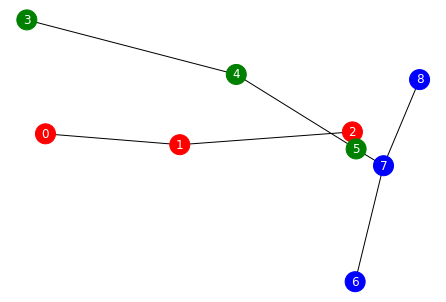

In [158]:
# Comencemos por recordar el grafo no dirigido que contruimos previamente
nx.draw(G,pos, with_labels=True, font_color='white', node_size=400, node_color=colors)

In [159]:
# Este contaba con un total de ocho nodos o estaciones
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8))

Ahora, armemos una función que nos permita identificar un mismo par de nodos de la red se encuentra conectado.

In [160]:
def existe_path_entre_nodos(grafo, nodo1, nodo2):
    """
    Verifica si los nodos 1 y 2 de un grafo se encuentran conectados por un mismo eje.
    """

    # inicializamos una lista con el extremo inicial de cada path o camino que vamos a recorrer
    cabeceras = [nodo1]
    
    # creamos un contador para almacenar la cantidad de nodos intermedios
    distancia = 0

    # iteramos la lista de nodos cabecera que almacenamos previamente
    for nodo in cabeceras:

        # Obtenemos los vecinos de cada nodo cabecera
        vecinos = grafo.neighbors(nodo)

        # y verificamos si el nodo de destino se encuentra dentro de los vecinos del nodo cabecera
        if nodo2 in vecinos:
            print('Existe un camino adyacente entre los nodos {} y {}'.format(nodo1, nodo2))
            # agregamos un nodo de distancia por conexión adyacente
            distancia += 1
            return distancia
            
        else:
            print('No existe adyacencia entre nodos {} y {}'.format(nodo1, nodo2))
            return distancia 

Vamos a aplicar esta función para evaluar la presencia de caminos adyacentes en alguna de las líneas de subte que creamos en nuestro grafo no dirigido. Si bien puede parecer algo evidente, veamos qué nos devuelve esta función si la usamos sobre los nodos de, por ejemplo, la línea B. 

In [161]:
# utilizamos los nodos 0,1 y 2
nodos_b = list(G.nodes)[:2]
for i in nodos_b:
    d = existe_path_entre_nodos(grafo=G, nodo1=i, nodo2=i+1)

c = d * len(nodos_b)
a = nodos_b[0]
b = nodos_b[-1]+1
print('Los estaciones {} y {} están separadas por {} nodo de distancia y suman {} conexiones adyacentes'.format(a,
                                                                                                                b,
                                                                                                                d,
                                                                                                                c))

Existe un camino adyacente entre los nodos 0 y 1
Existe un camino adyacente entre los nodos 1 y 2
Los estaciones 0 y 2 están separadas por 1 nodo de distancia y suman 2 conexiones adyacentes


En términos muy sencillos, lo que estamos haciendo en este ejemplo, es determinar la distancia entre nodos en un grafo no dirigido. Más allá del tipo de grafo, esta métrica puede determinarse de dos maneras. Considerando ejes ponderados o sin ponderar (en inglés, `weighted`). En lo que acabamos de ver, nuestro contador agregaba `1` por cada conexión adyacente por lo que podemos decir que estamos midiendo la distancia a partir de ejes que no tienen ningún peso. Es decir, valen lo mismo.

Ahora bien, debemos tener cuidado con algo y esto es que nuestra función está contemplando conexiones adyacentes! Es decir, conexiones que podrían ser caminos intermedios entre dos vértices que efectivamente se encuentran conectados.  

In [162]:
# Por ejemplo, que no haya conexión adyacente entre el último nodo de la línea B y el primero de la D ... 
existe_path_entre_nodos(grafo=G, nodo1=2, nodo2=3)

No existe adyacencia entre nodos 2 y 3


0

...no significa que ambas líneas no se encuentren conectadas. La función que acabamos de crear nos indica si un par de nodos son adyacentes o no, algo similar a lo que vimos con las matrices pero de una manera programática bastante diferente. Iterando en un for, este método nos permite identificar si existen caminos intermedios entre dos vértices ordenados.

In [163]:
# Como, por ejemplo, el 5 y el 2
existe_path_entre_nodos(grafo=G, nodo1=5, nodo2=2)

Existe un camino adyacente entre los nodos 5 y 2


1

En definitiva, lo que acabamos de hacer es identificar caminos intermedios que luego vamos a sumar para establecer la distancia total entre dos extremos que debemos definir por fuera de la función previa. Es decir, lo que vayamos a establecer como extremos de un recorrido está, en términos programáticos, por fuera de nuestra función de caminos adyacentes. 

Este problema, al que nos referimos como `path finding` se encuentra implícito en otro que mencionamos previamente. Para determinar cuál es el camino más corto entre nodos de una red, debemos  verificar previamente, que los vértices intermedios de dicho camino se encuentren conectados. Pero esto, es algo que seguramente podamos hacer de una manera mucho más fácil de lo que venimos viendo ...

#### 2.4.2.  Shortest path

El `shortest path` o [camino mas corto](https://es.wikipedia.org/wiki/Problema_del_camino_m%C3%A1s_corto#:~:text=En%20la%20teor%C3%ADa%20de%20grafos,a%20otra%20en%20un%20mapa.) implica, en teoría de grafos, encontrar el conjunto de ejes que minimice la suma de pesos entre dos extremos de una red. Es decir, entre un par de nodos determinado. 

Si nos retrotraemos al inicio del notebook, recordarán que un valor que definimos para ponderar la relación entre nodos (a partir de sus ejes) fue la cantidad de pasajeros. Sin embargo, en el ejemplo anterior, no utilizamos dicha medida para la suma de distancias. 

Esto es, porque como dijimos previamente, esta métrica puede calcularse en contextos de relaciones ponderadas y no ponderadas. Comúnmente, en redes de transporte, la estimación del `camino más corto` suele trabajarse con ejes ponderados por tiempo de viaje o por distancia lineal. Lo que nosotros hicimos anteriormente fue establecer el largo de un camino sumando conexiones adyadentes con un mismo peso. Pero esto se puede hacer de una manera mucho más eficiente.

`NetworkX` cuenta con [algunos métodos](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html) para determinar el camino más corto para ejes ponderados como sin ponderar. Entre los más importantes para tener en cuenta:

`all_pairs_shortest_path`: calcula el camino más corto entre todos los pares nodos de un grafo no ponderado

`all_pairs_shortest_path_length`: calcula el largo del camino más corto entre todos los pares de nodos de un grafo no ponderado.

`all_pairs_dijkstra_path`: calcula el camino más corto entro todos los pares de nodos de un grafo ponderado

`all_pairs_dijkstra_path_length`: calculata el largo del camino más corto entre todos los pares de nodos de un grafo ponderado.


Otra alternativa que ofrece `NetworkX` es trabajar de manera [genérica](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path) tanto para determinar el path como [su largo](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html#networkx.algorithms.shortest_paths.generic.shortest_path_length). Es decir, pasar el peso de los ejes como un parámetro más.

##### 2.4.2.1  Unweighted

Retomemos el ejemplo anterior para ver cómo funciona el camino más corto en grafos no ponderados

In [164]:
# para llegar de 0 a 2, el camino más corto implica pasar por 1
nx.shortest_path(G, source=0, target=2)

[0, 1, 2]

In [165]:
# lo que equivale a la sumatoria de dos caminos adyacentes
nx.shortest_path_length(G, source=0, target=2)

2

Como dijimos, el cálculo del camino más corto implica la identificación de conexiones adyacentes. Ahora bien, estos métodos nos permiten determinarlo de una manera mucho más eficiente, ya que por ejemplo, podemos hacerlo entre todos los nodos de la red...

In [166]:
# calculamos el camino más corto entre todos los pares de nodos de nuestra red
caminos=dict(nx.all_pairs_shortest_path(G))

In [167]:
# lo que nos permite obtener el path más corto entre cualquier par origen - destino
caminos[0][2]

[0, 1, 2]

In [168]:
# y tambien el largo del path
largo_caminos=dict(nx.all_pairs_shortest_path_length(G))

In [169]:
# al que podemos acceder de la misma manera. Ubicando primero la key de origen y luego la de destino
largo_caminos[0][2]

2

Encontrar el camino más corto, supone también reconocer caminos intermedios. Por decirlo de alguna manera, la diferencia entre métodos que venimos viendo entre `path finding` y `shortest path` radica en el hecho de poder intetificar conexiones de manera aislada (esto es, entre vértices contiguos) o en toda la red. Por ejemplo, encontrar el `shortest path` entre ...

In [170]:
# las primeras estaciones de las líneas B y D! 
nx.shortest_path(G, source=0, target=3)

[0, 1, 2, 5, 4, 3]

esto nos permite ver que si bien, como marcamos con anterioridad, el último nodo de la línea B y el primero de la D no se encuentran conectados de manera adyacente, uno podría llegar de un extremo al otro recorriendo ...

In [171]:
# un total de 5 tramos!
nx.shortest_path_length(G, source=0, target=3)

5

Esto, gracias a que existe una conexión adyacente entre:

In [172]:
# los nodos 5 y 2!
existe_path_entre_nodos(grafo=G, nodo1=5, nodo2=2)

Existe un camino adyacente entre los nodos 5 y 2


1

##### 2.4.2.2  Weighted

En redes de transporte es muy común que la estimación del camino más corto contemple ponderadores como tiempo y distancia. Ahora, veremos cómo especificar atributos de los ejes en los métodos detallados para calcular el `shortest path` con grafos ponderados. 

Esto lo vamos a hacer principalmente para ilustrar cómo utilizar dichos métodos. Dado que estamos trabajando con un recorte de la red de subterráneos, y que la conexión entre líneas siempre se da entre el mismo par de nodos adyacentes, los resultados van a ser iguales a una estimación no ponderada. 

In [173]:
# recordemos nuestroa atributos
G.edges(data=True)

EdgeDataView([(0, 1, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 23}), (1, 2, {'pasajeros': 87, 'fecha': '2019-10-01', 'hora': '09:30:00'}), (2, 5, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 128}), (3, 4, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 94}), (4, 5, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 88}), (5, 7, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 154}), (6, 7, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 88}), (7, 8, {'fecha': '2019-10-01', 'hora': '09:30:00', 'pasajeros': 24})])

In [174]:
# y agreguemos algún ponderador que tenga más sentido que nuestro valor de pasajeros
def agrega_atributos_ejes():
    conexiones_lineas = [(2,5),(5,7)]
    conexiones_estaciones = [i for i in G.edges if i not in conexiones_lineas]
    
    for i in conexiones_estaciones:
        G.edges[i[0], i[1]]['tiempo_viaje']=random.randint(1,5)
    
    for i in conexiones_lineas:
        G.edges[i[0], i[1]]['tiempo_viaje']=random.randint(1,60)

In [175]:
agrega_atributos_ejes()

In [176]:
nx.shortest_path(G, source=0, target=3, weight='tiempo_viaje')

[0, 1, 2, 5, 4, 3]

In [177]:
caminos_ponderados = dict(nx.all_pairs_dijkstra_path(G, weight='tiempo_viaje'))

In [178]:
caminos_ponderados[0][3]

[0, 1, 2, 5, 4, 3]

El uso es similar. Uno podría calcular caminos entre pares origen destino, o para toda la red. Obteniendo luego el resultado deseado una vez que se llama el par buscado en el objeto instanciado dentro de un diccionario. Esto aplica tanto para el algoritmo `dijkstra` que devuelve el path mismo como su largo. 

### 2.5. Betweenness centrality

Todo este preludio con una única finalidad. Poder comprender otra de las métricas más utilizadas para estudiar `centralidad` dentro de una red. El `betweenness centrality` es una métrica de intermediación que permite cuantificar el número de veces que un nodo actúa como puente a lo largo del camino más corto entro dos nodos.

En otras palabras, es una medida que capta la importancia de un nodo dentro de una red. Esto, a partir de su presencia en la totalidad de tramos o caminos más cortos que existen dentro de la misma. 

A mayor frecuencia de apariciones de un nodo en los caminos más cortos, es de esperar que este cumpla un rol central en el flujo de información de un sector de la red a otro.  

Técnicamente, [esta métrica](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality) devuelve el porcentaje de caminos más cortos que deben pasar por un nodo específico. A mayor cantidad de caminos, más alto será el valor de intermediación del nodo!

In [179]:
# Calculemos el valor de intermediación para nuestra red de subterráneos
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.25,
 2: 0.42857142857142855,
 3: 0.0,
 4: 0.25,
 5: 0.75,
 6: 0.0,
 7: 0.46428571428571425,
 8: 0.0}

In [180]:
# estas eran nuestras labels con el id del nodo
lab

{0: 'CALLAO',
 1: 'URUGUAY',
 2: 'C. PELLEGRINI',
 3: 'CALLAO',
 4: 'TRIBUNALES - TEATRO COLÓN',
 5: '9 DE JULIO',
 6: 'AV. DE MAYO',
 7: 'DIAGONAL NORTE',
 8: 'LAVALLE'}

In [181]:
# instanciamos la métrica
intermediacion = nx.betweenness_centrality(G)

In [182]:
# y obtenemos la key con valor más alto
max(intermediacion, key=intermediacion.get)

5

En nuestro grafo, la estación con mayor valor de intermediación es `9 de Julio`. Algo esperable si visualizamos que es una estación que permite conectar distintas líneas del subterráneo entre sí. El índice de intermediación (o `betweenness centrality` nos indica que el 75% de los `shortest path` pasan por este nodo!

## **Ejercitación**

1. Armar una función que devuelve el/los nodo/s con mayor valor de intermediación (`betweenness centrality`) dentro de una red.

In [183]:
# Desarrollar ejercicio

### Solución

In [184]:
def mayor_intermediacion(grafo):
    '''
    Devuelve los nodos con mayor valor de intermediación dentro de un grafo
    '''

    # Calculamos el betweenes centrality,
    intermediacion = nx.betweenness_centrality(grafo)

    # almacenamos el resultado en una lista y obtenemos el valor de intermediación más alto
    max_int = max(list(intermediacion.values()))

    # preparamos un set para almacenar valores únicos
    nodos = set()

    # Iteratamos  el diccionario de resultados que devuelve el betweennes centrality 
    for k, v in intermediacion.items():

        # verificamos que el item del diccionario que estamo iterando alcanza la máxima intermediación
        if v == max_int:

            # y si es verdadero lo agregamos al set de nodos
            nodos.add(k)

    return nodos

Ubicamos los nodos que alcanzan el máximo valor de intermediación computado en el grafo:

In [185]:
nodos_centrales = mayor_intermediacion(grafo=G)

In [186]:
# estos son nuestros nodos con mayor influencia dentro de la red
nodos_centrales

{5}

In [157]:
# Betweeness centrality
# M1 es el numero de nodos en el extremo final y m2 la cantidad de nodos en el puente entre ambos
Gb = nx.barbell_graph(m1=5, m2=1)

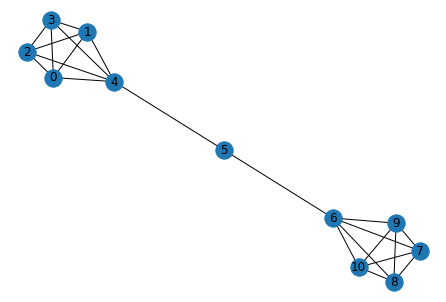

In [372]:
nx.draw(Gb, with_labels=True)

In [362]:
# La key es el nodo y el valr es el betweenness centrality
nx.betweenness_centrality(Gb)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 5: 0.5555555555555556}

## Triangulos 

In [ ]:
from itertools import combinations

In [ ]:
# Iterar sobre every pair of nodes and not only every edge
for n1, n2 in combinations(G.nodes(),2):
    print(n1,n2)

In [ ]:
# Define is_in_triangle(): podria servir para encontrar cliques entre las estaciones
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1,n2):
            in_triangle = True
            break
    return in_triangle

In [ ]:
is_in_triangle(G,2)

In [ ]:
#Finding nodes involved in triangles

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1,n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

# Write the assertion statement
assert len(nodes_in_triangle(G, 1)) == 5

In [ ]:
#Finding open triangles

# Define node_in_open_triangle(G,n)
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n),2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1,n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in G.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(G,n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

## Cliques y maximal cliques 

In [ ]:
# Finding maximal cliques
Z = nx.barbell_graph(m1=5, m2=1)

nx.find_cliques(Z)

# Lista con los maximal cliques
list(nx.find_cliques(Z))

In [ ]:
nx.find_cliques(Z)

In [ ]:
#Finding all maximal cliques of size "n"

# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 3 in the graph T
assert len(maximal_cliques(Z, 3)) == 33


In [ ]:
# En el grafo Z hay dos maximal cliques de 5 nodos
maximal_cliques(Z, 5)

## Subgraphs: analizar subsets de nodos 

In [294]:
# n es la cantidad de nodos y p la probabilidad que exista un eje entre un par de nodos
E = nx.erdos_renyi_graph(n=20, p=0.2)

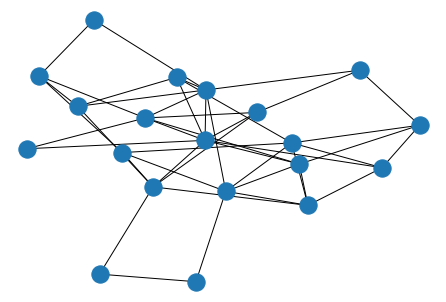

In [295]:
nx.draw(E)

In [296]:
# Genera un grafo de manera probabilistica. En el caso anterior, 20 nodos con 37 edges
list(E.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [297]:
# Vamos a plotear el nodo 8 y sus vecinos

# Definimos los vecinos del nodo 8
nodes = list(E.neighbors(8))

# se agregan el nodo 8 a la lista con sus vecinos
nodes.append(8)

In [298]:
# Almacenamos la lista conteniendo el nodo 8 con sus vecinos en un subgrafo
E_ocho = E.subgraph(nodes)

# Vemos sus ejes: tambien devuelve los ejes que tienen los vecinos de 8 (con otros nodos distintos)
E_ocho.edges()

EdgeView([(8, 10), (8, 14), (8, 17)])

In [299]:
# Ambos grafos tienen el mismo datatype
E

In [300]:
E_ocho

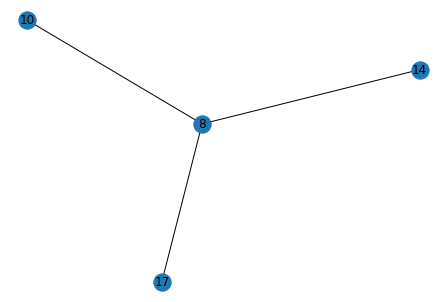

In [301]:
# ploteamos el subgrafo: se le pasa el grafo como objeto
nx.draw(E_ocho, with_labels=True)